Preliminaries


In [2]:
#Import Stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss


In [3]:
#Import more stuff
import thinkplot
import thinkstats2

In [4]:
#Loading data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()
df.tail()
df.describe(include="all")

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992,15992,15992,15992,15992.000000,15992.000000,15992.000000,15992.000000
unique,NaN,5,2,2,2,NaN,NaN,NaN,NaN
top,NaN,HighSchool,NotBlack,NotHispanic,Married,NaN,NaN,NaN,NaN
freq,NaN,6252,14816,14840,11382,NaN,NaN,NaN,NaN
mean,33.225238,NaN,NaN,NaN,NaN,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,NaN,NaN,NaN,NaN,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,24.000000,NaN,NaN,NaN,NaN,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,NaN,NaN,NaN,NaN,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,NaN,NaN,NaN,NaN,1.000000,23584.180000,22923.737500,25564.670000


In [ ]:
df.tail(20)

In [ ]:
df.info()

Age:
    Make and plot a Hist and Pmf for age.
    What fraction of the people in the data are 51? What fraction are older than 51?
    What is the median age? Does the distribution of the sample data seem to mirror the working age population?

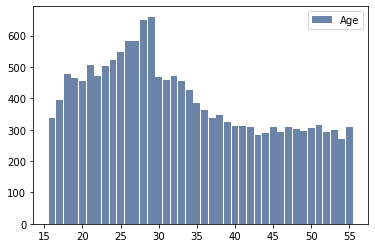

In [7]:
#Hist
hist_age = thinkstats2.Hist(round(df["Age"], 0), label= "Age")
thinkplot.Hist(hist_age)
thinkplot.Config()

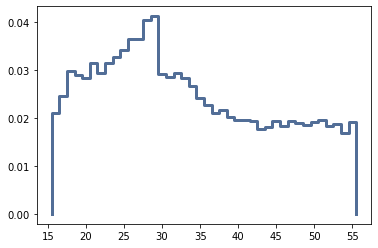

In [36]:
#PMF
pmf_age = thinkstats2.Pmf(df["Age"])
thinkplot.Pmf(pmf_age)
thinkplot.Config()

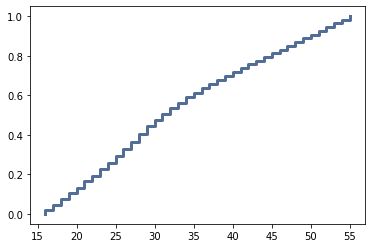

In [8]:
#CDF
cdf_age = thinkstats2.Cdf(df["Age"])
thinkplot.Cdf(cdf_age)
thinkplot.Config()

In [9]:
# Fraction of data that is 51 years
cdf_51 = cdf_age.Prob(51)-cdf_age.Prob(50)

# Fraction of data that is over 51 years
cdf_over51 = 1 - cdf_age.Prob(51)

print("Fraction of data that is 51 years of age: " + str(round(100*cdf_51,ndigits=2)) + "%.")
print("Fraction of data that is over 51 years of age: " + str(round(100*cdf_over51,ndigits=2)) + "%.")

Fraction of data that is 51 years of age: 1.96%.
Fraction of data that is over 51 years of age: 7.32%.


In [146]:
# Median age
median_age = cdf_age.Value(.50)
median_age # the sample has slightly lower median age than the current median age of the working popultaion in US

31

Demographics:
    Consider some of the demographic features: Education, Race, Hisp, MaritalStatus, and Nodeg. This data came from the United States, does it appear to be a representative sample of the US population? Demonstrate this in some way in your code. 

Facts from https://www.census.gov/quickfacts/fact/table/US/POP010220#POP010220

Education and Nodeg (1=HS Dropout): 
    High School graduate or higher, percent of persons age 25+ years - 88.0%
    Bachelor's degree or higher, percent of persons age 25+ years    - 32.1%

Race:
    Black or African American alone, percent                         - 13.4%

Hisp:
    Hispanic or Latino, percent                                     - 18.5%

Facts from https://www.statista.com/statistics/242030/marital-status-of-the-us-population-by-sex/

Marital Status:
    Married (Male), in millions                                     - 68.43
    Married (Female), in millions                                   - 69.34
    Total Married (Both Sexes), in millions                         - 137.77 (52.0%)
    Total (Both Sexes), in millions                                 - 264.69

In [10]:
# Education and Nodeg
df_25up = df[df["Age"] >= 25]
hs_grad = df_25up[df_25up["Nodeg"]== 0]
bach_grad = df_25up[(df_25up["Eduacation"]=="graduate") | (df_25up["Eduacation"]=="PostGraduate")]
print("High school graduate: " + str(round(100*hs_grad["Eduacation"].count()/df_25up["Eduacation"].count(),1)) + "%")
print("Bachelor's degree graduate: " + str(round(100*bach_grad["Eduacation"].count()/df_25up["Eduacation"].count(),1)) + "%")

High school graduate: 73.0%
Bachelor's degree graduate: 17.3%


The sample has lower percentage of high school and bachelor's degree graduate than the general population of the US.

In [11]:
df_25up["Eduacation"].value_counts()/df_25up["Eduacation"].count()

HighSchool            0.392397
LessThanHighSchool    0.269915
Intermediate          0.164377
graduate              0.098457
PostGraduate          0.074855
Name: Eduacation, dtype: float64

In [12]:
# Race
df_black = df[df["Race"] == "black"]
df_nblack = df[df["Race"] == "NotBlack"]
print("Black: " + str(round(100*df_black["Race"].count()/df["Race"].count(),1)) + "%")
print("Not black: " + str(round(100*df_nblack["Race"].count()/df["Race"].count(),1)) + "%")

Black: 7.4%
Not black: 92.6%


Sample has percentage of black people that is lower than the general population.

In [13]:
# Hisp
df_Hisp = df[df["Hisp"] == "hispanic"]
df_nHisp = df[df["Hisp"] == "NotHispanic"]
print("Hispanic: " + str(round(100*df_Hisp["Hisp"].count()/df["Hisp"].count(),1)) + "%")
print("Not hispanic: " + str(round(100*df_nHisp["Hisp"].count()/df["Hisp"].count(),1)) + "%")

Hispanic: 7.2%
Not hispanic: 92.8%


Sample has percentage of hispanic people that is lower than the general population.

In [14]:
# Marital Status
df_Mar = df[df["MaritalStatus"] == "Married"]
df_nMar = df[df["MaritalStatus"] == "NotMarried"]
print("Married: " + str(round(100*df_Mar["MaritalStatus"].count()/df["MaritalStatus"].count(),1)) + "%")
print("Not Married: " + str(round(100*df_nMar["MaritalStatus"].count()/df["MaritalStatus"].count(),1)) + "%")

Married: 71.2%
Not Married: 28.8%


Sample has percentage of married people that is greater than the general population.

Earnings:
o	Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    ♣	What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?

<AxesSubplot:xlabel='Earnings_1974', ylabel='Count'>

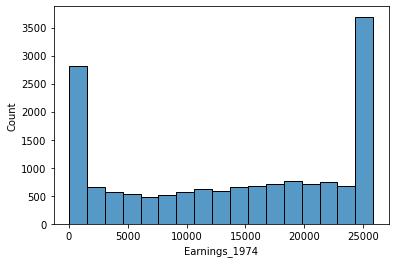

In [63]:
sns.histplot(data=df, x = "Earnings_1974")

<AxesSubplot:xlabel='Earnings_1975', ylabel='Count'>

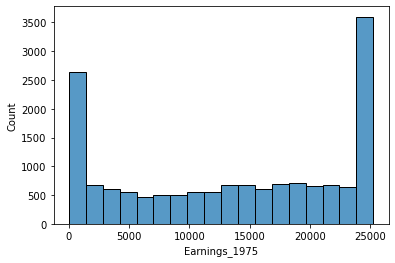

In [64]:
sns.histplot(data=df, x = "Earnings_1975")

<AxesSubplot:xlabel='Earnings_1978', ylabel='Count'>

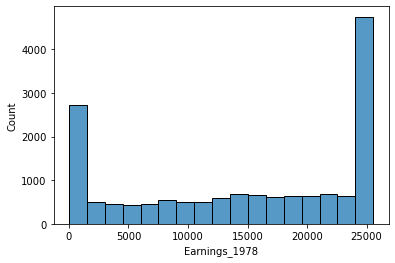

In [65]:
sns.histplot(data=df, x = "Earnings_1978")

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

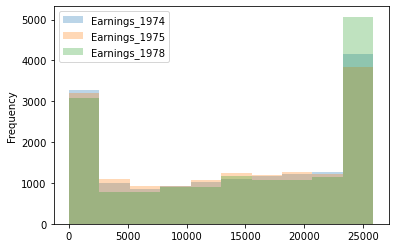

In [148]:
df4 = df[["Earnings_1974", "Earnings_1975", "Earnings_1978"]]
plt.figure()
df4.plot.hist(alpha=0.3)

Based on the Histograms, it appears that the earnings generally increased from 1974 to 1978. This is becuase the 1974 earnings tend to be highest on the left side of the distrbution while the 1978 earnings tend to be highest at the right side of the distribution. However, it is not clear whether the earnings increased between 1974 to 1975. To determine this, we look at the median earnings for each year.

In [151]:
median_1974 = df["Earnings_1974"].median()
median_1975 = df["Earnings_1975"].median()
median_1978 = df["Earnings_1978"].median()

print("Median Earnings 1974: " + str(median_1974))
print("Median Earnings 1975: " + str(median_1975))
print("Median Earnings 1978: " + str(median_1978))

Median Earnings 1974: 15123.58
Median Earnings 1975: 14557.11
Median Earnings 1978: 16421.975


It appears that the median earnings dropped between 1974 to 1975. This fact is not clearly seen in the histograms.

Earnings:
o	Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? What could you investigate further in an attempt to explain this?

In [ ]:
def EffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [ ]:
# Race
EffectSize(df_black["Earnings_1978"], df_nblack["Earnings_1978"])

-0.31883255859070525

In [ ]:
# Hispanic
EffectSize(df_Hisp["Earnings_1978"], df_nHisp["Earnings_1978"])

-0.16210284395555566

In [ ]:
# Marital Status
EffectSize(df_Mar["Earnings_1978"], df_nMar["Earnings_1978"])

0.5737396692403472

In [ ]:
# No deg
df_nodeg = df[df["Nodeg"] == 1]
df_deg = df[df["Nodeg"] == 0]
EffectSize(df_nodeg["Earnings_1978"], df_deg["Earnings_1978"])

-0.3367928897615812

The greatest effect size was between Married and NotMarried people. Married people tend to earn more than their unmarried counterparts. A possible way to further investigate this is to look at the relationship between marital status and age. If marital status tend to be positively associated with age, it could be that the reason why married people tend to earn more is because they tend to be older and therefore are in higher paying positions at work compared to unmarried people. Another possible way is to see if married people tend to be more motivated at work than their unmarried counterpart, and see if that difference in motivation (if it exists) affects their earnings.

Earnings:
o	Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. 

In [ ]:
df_median_cohort = median_cohort(df, "Race", "Hisp", "Nodeg", "MaritalStatus", "Earnings_1978")
df_median_cohort

In [58]:
def median_diff_cohort(df, cohort1, cohort2, cohort3, cohort4, earnings_column):
    cohorts = ["cohort1", "cohort2", "cohort3", "cohort4"]
    grouped = df.groupby([cohort1, cohort2, cohort3, cohort4])
    for group in grouped:
        print(grouped[group])

In [120]:
df_w_group = df["grouping"] = df["Race"] + df["Hisp"] + df["MaritalStatus"] + str(df["Nodeg"])
df_w_group = pd.DataFrame(df_w_group)

In [121]:

df_w_group["Earnings_1978"] = df["Earnings_1978"]

In [191]:
df_w_group[0]

0        NotBlackNotHispanicMarried0        1\n1       ...
1        NotBlackNotHispanicNotMarried0        1\n1    ...
2        NotBlackNotHispanicMarried0        1\n1       ...
3        NotBlackNotHispanicMarried0        1\n1       ...
4        NotBlackNotHispanicMarried0        1\n1       ...
                               ...                        
15987    blackNotHispanicNotMarried0        1\n1       ...
15988    blackNotHispanicMarried0        1\n1        0\...
15989    NotBlackNotHispanicNotMarried0        1\n1    ...
15990    NotBlackNotHispanicMarried0        1\n1       ...
15991    NotBlackNotHispanicNotMarried0        1\n1    ...
Name: 0, Length: 15992, dtype: object

In [ ]:
#Create subsets
for i in {'NotBlack', 'black'}:
    for j in {'NotHispanic', 'hispanic'}:
        for k in {0, 1}:
            for l in {'Married', 'NotMarried'}:
                Group_ijkl = df[df["Race"] == i & df["Hisp"] == j & df["Nodeg"] == k & df["MaritalStatus"] == l]

In [195]:
Group_0 = df[(df["Race"] == "NotBlack") & (df["Hisp"] == "NotHispanic") & (df["Nodeg"] == 0) & (df["MaritalStatus"] == "Married")]
Group_1 = df[(df["Race"] == "NotBlack") & (df["Hisp"] == "NotHispanic") & (df["Nodeg"] == 0) & (df["MaritalStatus"] == "NotMarried")]
Group_2 = df[(df["Race"] == "NotBlack") & (df["Hisp"] == "NotHispanic") & (df["Nodeg"] == 1) & (df["MaritalStatus"] == "Married")]
Group_3 = df[(df["Race"] == "NotBlack") & (df["Hisp"] == "NotHispanic") & (df["Nodeg"] == 1) & (df["MaritalStatus"] == "NotMarried")]
Group_4 = df[(df["Race"] == "NotBlack") & (df["Hisp"] == "hispanic") & (df["Nodeg"] == 0) & (df["MaritalStatus"] == "Married")]
Group_5 = df[(df["Race"] == "NotBlack") & (df["Hisp"] == "hispanic") & (df["Nodeg"] == 0) & (df["MaritalStatus"] == "NotMarried")]
Group_6 = df[(df["Race"] == "NotBlack") & (df["Hisp"] == "hispanic") & (df["Nodeg"] == 1) & (df["MaritalStatus"] == "Married")]
Group_7 = df[(df["Race"] == "NotBlack") & (df["Hisp"] == "hispanic") & (df["Nodeg"] == 1) & (df["MaritalStatus"] == "NotMarried")]
Group_8 = df[(df["Race"] == "black") & (df["Hisp"] == "NotHispanic") & (df["Nodeg"] == 0) & (df["MaritalStatus"] == "Married")]
Group_9 = df[(df["Race"] == "black") & (df["Hisp"] == "NotHispanic") & (df["Nodeg"] == 0) & (df["MaritalStatus"] == "NotMarried")]
Group_10 = df[(df["Race"] == "black") & (df["Hisp"] == "NotHispanic") & (df["Nodeg"] == 1) & (df["MaritalStatus"] == "Married")]
Group_11 = df[(df["Race"] == "black") & (df["Hisp"] == "NotHispanic") & (df["Nodeg"] == 1) & (df["MaritalStatus"] == "NotMarried")]


In [211]:
Group_0_Hist = thinkstats2.Hist(round(Group_0["Earnings_1978"], -3))
Group_1_Hist = thinkstats2.Hist(round(Group_1["Earnings_1978"], -3))
Group_2_Hist = thinkstats2.Hist(round(Group_2["Earnings_1978"], -3))
Group_3_Hist = thinkstats2.Hist(round(Group_3["Earnings_1978"], -3))
Group_4_Hist = thinkstats2.Hist(round(Group_4["Earnings_1978"], -3))
Group_5_Hist = thinkstats2.Hist(round(Group_5["Earnings_1978"], -3))
Group_6_Hist = thinkstats2.Hist(round(Group_6["Earnings_1978"], -3))
Group_7_Hist = thinkstats2.Hist(round(Group_7["Earnings_1978"], -3))
Group_8_Hist = thinkstats2.Hist(round(Group_8["Earnings_1978"], -3))
Group_9_Hist = thinkstats2.Hist(round(Group_9["Earnings_1978"], -3))
Group_10_Hist = thinkstats2.Hist(round(Group_10["Earnings_1978"], -3))
Group_11_Hist = thinkstats2.Hist(round(Group_11["Earnings_1978"], -3))

In [209]:
Group_0_pmf = thinkstats2.Pmf(Group_0["Earnings_1978"])
Group_1_pmf = thinkstats2.Pmf(Group_1["Earnings_1978"])
Group_2_pmf = thinkstats2.Pmf(Group_2["Earnings_1978"])
Group_3_pmf = thinkstats2.Pmf(Group_3["Earnings_1978"])
Group_4_pmf = thinkstats2.Pmf(Group_4["Earnings_1978"])
Group_5_pmf = thinkstats2.Pmf(Group_5["Earnings_1978"])
Group_6_pmf = thinkstats2.Pmf(Group_6["Earnings_1978"])
Group_7_pmf = thinkstats2.Pmf(Group_7["Earnings_1978"])
Group_8_pmf = thinkstats2.Pmf(Group_8["Earnings_1978"])
Group_9_pmf = thinkstats2.Pmf(Group_9["Earnings_1978"])
Group_10_pmf = thinkstats2.Pmf(Group_10["Earnings_1978"])
Group_11_pmf = thinkstats2.Pmf(Group_11["Earnings_1978"])

<AxesSubplot:ylabel='Frequency'>

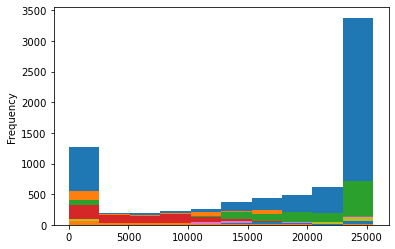

In [217]:
# Plot Histograms
Group_0["Earnings_1978"].plot.hist()
Group_1["Earnings_1978"].plot.hist()
Group_2["Earnings_1978"].plot.hist()
Group_3["Earnings_1978"].plot.hist()
Group_4["Earnings_1978"].plot.hist()
Group_5["Earnings_1978"].plot.hist()
Group_6["Earnings_1978"].plot.hist()
Group_7["Earnings_1978"].plot.hist()
Group_8["Earnings_1978"].plot.hist()
Group_9["Earnings_1978"].plot.hist()
Group_10["Earnings_1978"].plot.hist()
Group_11["Earnings_1978"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

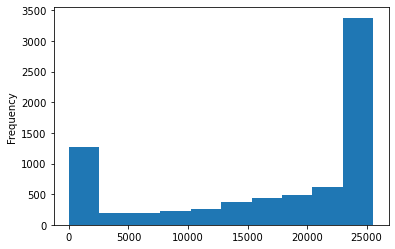

In [218]:
Group_0["Earnings_1978"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

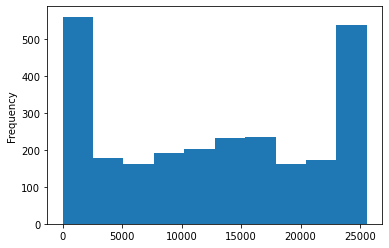

In [219]:
Group_1["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

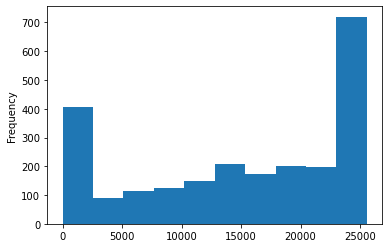

In [220]:
Group_2["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

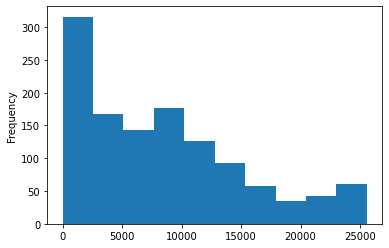

In [221]:
Group_3["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

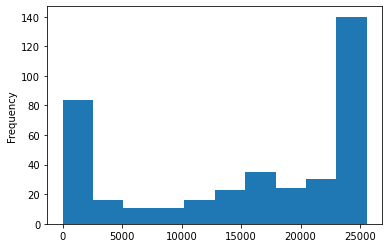

In [222]:
Group_4["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

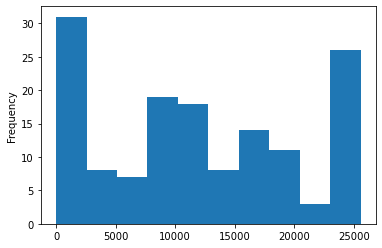

In [223]:
Group_5["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

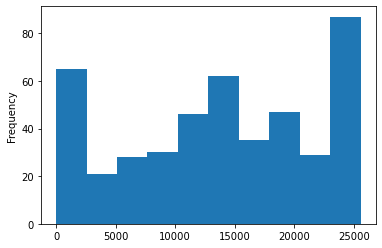

In [224]:
Group_6["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

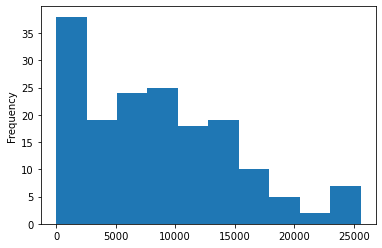

In [225]:
Group_7["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

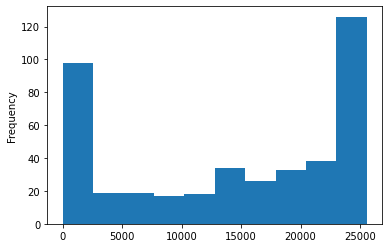

In [226]:
Group_8["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

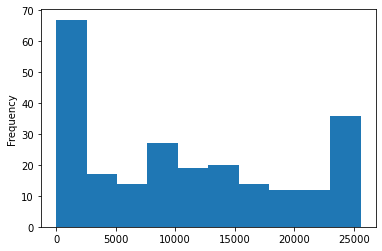

In [227]:
Group_9["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

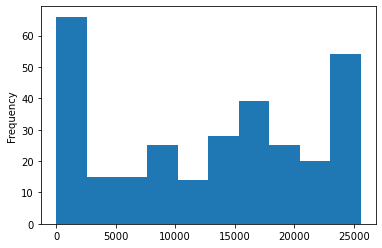

In [228]:
Group_10["Earnings_1978"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

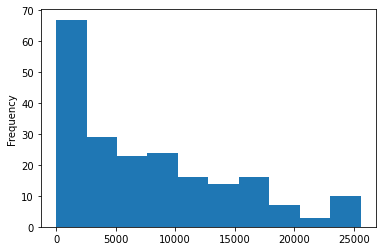

In [229]:
Group_11["Earnings_1978"].plot.hist()

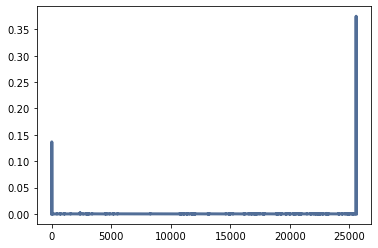

In [210]:
# Plot pmfs
thinkplot.pmf(Group_0_pmf)
thinkplot.config()

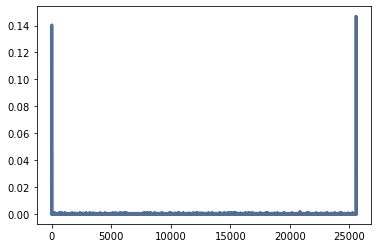

In [233]:
thinkplot.pmf(Group_1_pmf)
thinkplot.config()

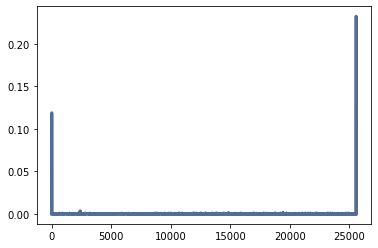

In [234]:
thinkplot.pmf(Group_2_pmf)
thinkplot.config()

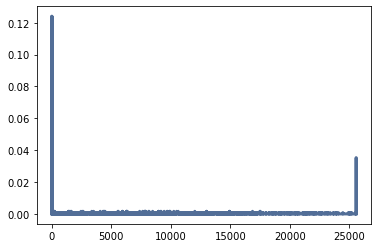

In [235]:
thinkplot.pmf(Group_3_pmf)
thinkplot.config()

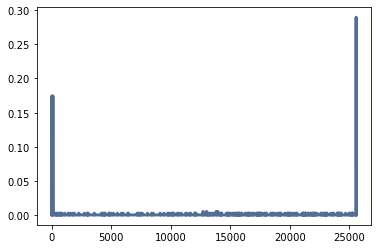

In [236]:
thinkplot.pmf(Group_4_pmf)
thinkplot.config()

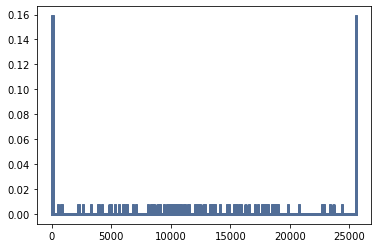

In [237]:
thinkplot.pmf(Group_5_pmf)
thinkplot.config()

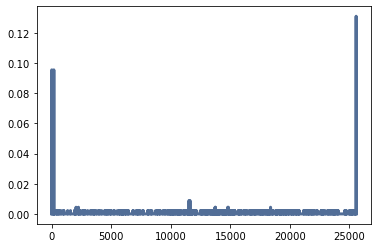

In [238]:
thinkplot.pmf(Group_6_pmf)
thinkplot.config()

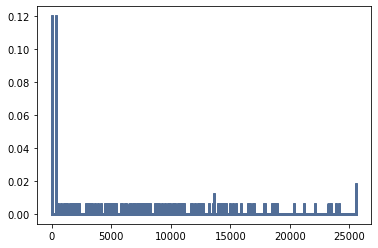

In [239]:
thinkplot.pmf(Group_7_pmf)
thinkplot.config()

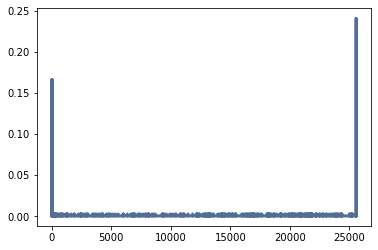

In [240]:
thinkplot.pmf(Group_8_pmf)
thinkplot.config()

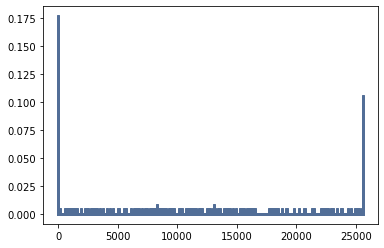

In [241]:
thinkplot.pmf(Group_9_pmf)
thinkplot.config()

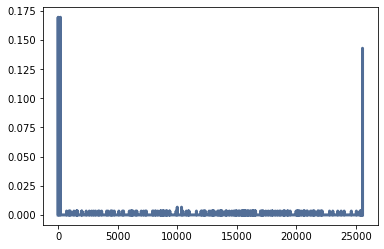

In [242]:
thinkplot.pmf(Group_10_pmf)
thinkplot.config()

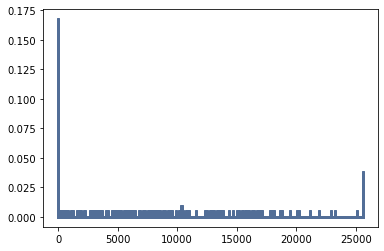

In [243]:
thinkplot.pmf(Group_11_pmf)
thinkplot.config()

Earnings:
What is the difference in median income between the groups? Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.

In [166]:
df_stats = df.groupby(["Race", "Hisp", "Nodeg", "MaritalStatus"], as_index=False)["Earnings_1978"].agg(['mean', 'median', 'min', 'max', 'count'])

In [167]:
df_stats = df_stats.reset_index()
df_stats

,Race,Hisp,Nodeg,MaritalStatus,mean,median,min,max,count
0,NotBlack,NotHispanic,0,Married,17235.340482,21630.225,0.0,25564.67,7426
1,NotBlack,NotHispanic,0,NotMarried,12709.404624,13111.130,0.0,25564.67,2634
2,NotBlack,NotHispanic,1,Married,15205.164579,17010.110,0.0,25564.67,2387
3,NotBlack,NotHispanic,1,NotMarried,8310.609171,7376.811,0.0,25564.67,1217
4,NotBlack,hispanic,0,Married,15387.293929,17774.835,0.0,25564.67,390
5,NotBlack,hispanic,0,NotMarried,11994.207503,11521.830,0.0,25564.67,145
6,NotBlack,hispanic,1,Married,13930.807568,14356.855,0.0,25564.67,450
7,NotBlack,hispanic,1,NotMarried,8526.376053,7928.003,0.0,25564.67,167
8,black,NotHispanic,0,Married,14354.021437,16321.490,0.0,25564.67,428
9,black,NotHispanic,0,NotMarried,10660.661030,9175.943,0.0,25564.67,238


In [230]:
df_stats["median"].max()

21630.225

In [231]:
df_stats["median"].min()

5975.926

In [232]:
df_stats["median"].max()-df_stats["median"].min()

15654.298999999999

The median value of 1978 earnings for all the groups has a range of 15654.3 with the highest value of 21630.2 (for NotBlack, NotHispanic, O-Nodeg and Married group) and the lowest value of 5975.9 (for Black, NotHispanic, 1-Nodeg and NotMarried group). As above, it is worth exploring how age relates to the factors across which the earnings are being compared. The idea here is to have the age serve as a proxy for a more direct factor, which is the length of experience at work. Another kind of factor that could help explain the differences is the type of industry the participants in this study are in. It is possible that certain demographics gravitate towards a specific type of industry, which could also determine the income level they can attain.

<AxesSubplot:xlabel='Earnings_1978', ylabel='Count'>

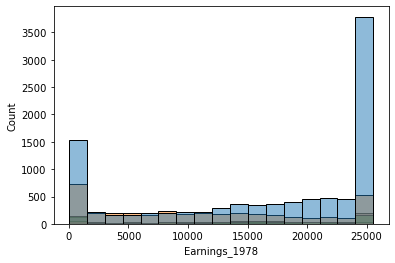

In [81]:
sns.histplot(data=df_w_group, x = "Earnings_1978", hue = 0, legend=False)

Earnings:
Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. What can you infer from the presence of outliers that may impact analysis of this data

In [198]:
# Checking for outliers using +/- 1.5*IQR
IQR = np.percentile(df["Earnings_1978"], 75)-np.percentile(df["Earnings_1978"], 25)
min_value = np.percentile(df["Earnings_1978"], 25) - 1.5*IQR
max_value = np.percentile(df["Earnings_1978"], 25) + 1.5*IQR

In [202]:
# Retrieving outliers values
df[(df["Earnings_1978"] < min_value) | (df["Earnings_1978"] > max_value)]

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,grouping


No values were found to be an outlier based on the the interquartile rule to find outliers.